<a href="https://colab.research.google.com/github/AdrienAlvarez/AdrienAlvarez/blob/main/Analysez%20les%20ventes%20d'une%20librairie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projet 6 : Analysez les ventes d'une librairie**

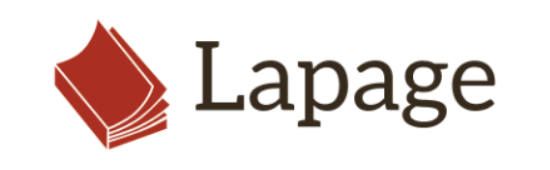

**Import des librairies Python**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import des fonctions**

In [ ]:
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage.
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage.
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

**Import des DataFrames**

In [ ]:
clients = pd.read_csv('/content/customers.csv', sep=',')
produits = pd.read_csv('/content/products.csv', sep=',')
transactions = pd.read_csv('/content/transactions.csv', sep=',')

###**Les dataframes**

In [ ]:
clients.head(2)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975


In [ ]:
produits.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


In [ ]:
transactions.head(2)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534


###**Les infos des dataframes**

In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [ ]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41879 entries, 0 to 41878
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_prod     41879 non-null  object
 1   date        41879 non-null  object
 2   session_id  41879 non-null  object
 3   client_id   41879 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


#**-----------------------------------------------**

#**NETTOYAGE DES DONNEES**

#**-----------------------------------------------**

#**Clients**

In [ ]:
clients.head(2)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


##**Valeurs manquantes**

In [ ]:
# On regarde combien il y a de valeurs manquantes dans chaque colonnes.
print(clients.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


Il n y a aucune valeur manquante.

##**Érreur lexicale**

In [ ]:
# On regarde toutes les réponses qu'il y a dans la colonne 'sex'.
clients['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

Il n y a pas d'erreur lexicale dans la colonne 'sex'.

In [ ]:
# On regarde toutes les réponses qu'il y a dans la colonne 'birth'.
clients['birth'].value_counts()

2004    440
1979    215
1988    207
1986    203
1978    199
       ... 
1933      8
1932      6
1931      4
1930      4
1929      3
Name: birth, Length: 76, dtype: int64

Il n y a pas d'erreur lexicale dans la colonne 'birth', car les années de naissance vont bien de 1929 à 2004.



##**Érreur d'irrégularité**

Il n y a pas d'unité donc il n y a pas d'erreur d'irrégularité.

##**Érreur de format**

Il n y a pas de date, ni d'heure.. Il n y a donc pas d'érreur de format.

##**Doublon**

In [ ]:
# On test la colonne 'client_id' pour savoir si c'est bien une clé primaire.
testerCle(clients,['client_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (8623, 3) (lignes, colonnes)


##**Outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


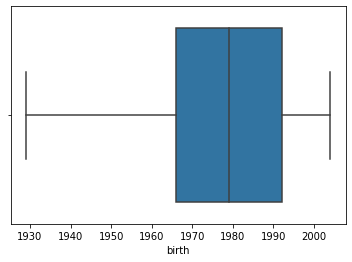

In [ ]:
# Nous allons vérifier les outliers de la colonne 'birth'.
sns.boxplot(clients['birth'])

In [ ]:
q1_clients=clients["birth"].quantile(q=0.25)

In [ ]:
q3_clients=clients["birth"].quantile(q=0.75)

In [ ]:
IQR_clients=q3_clients-q1_clients

In [ ]:
borne_inf_clients = q1_clients-1.5*IQR_clients

In [ ]:
borne_inf_clients

1927.0

In [ ]:
borne_sup_clients = q3_clients +1.5*IQR_clients

In [ ]:
borne_sup_clients

2031.0

In [ ]:
outliers_clients = clients[clients["birth"]>borne_sup_clients] 

In [ ]:
outliers_clients = clients[clients["birth"]<borne_inf_clients] 

In [ ]:
outliers_clients

,client_id,sex,birth


Il n y a donc pas d'outlier dans les années de naissances.

#**Produits**

In [ ]:
produits.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


In [ ]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


##**Valeurs manquantes**

In [ ]:
# On regarde combien il y a de valeurs manquantes dans chaque colonnes.
print(produits.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


Il y a aucune valeur manquante dans le dataframe 'products'.

##**Érreur lexicale**

Il n y a aucune erreur lexicale car les colonnes n'ont pas de texte mise à part l'id'.

##**Érreur d'irrégularité**

Il n y a aucune erreur d'irrégularité car les colonnes n'ont pas d'unités précises.

##**Érreur de format**

Il n y a aucune erreur de format car il n y a pas d'heure ni de date.

##**Doublon**

In [ ]:
# On test la colonne 'id_prod' pour savoir si c'est bien une clé primaire.
testerCle(produits,['id_prod'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (3287, 3) (lignes, colonnes)


##**Outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


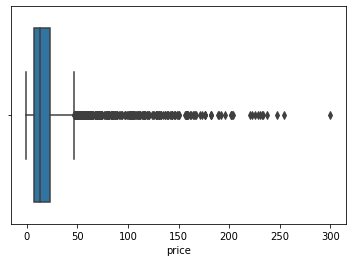

In [ ]:
# Nous allons vérifier les outliers de la colonne 'price'.
sns.boxplot(produits['price'])

In [ ]:
q1_produits=produits["price"].quantile(q=0.25)

In [ ]:
q3_produits=produits["price"].quantile(q=0.75)

In [ ]:
IQR_produits=q3_produits-q1_produits

In [ ]:
borne_inf_produits = q1_produits-1.5*IQR_produits

In [ ]:
borne_inf_produits

-17.009999999999998

In [ ]:
borne_sup_produits = q3_produits +1.5*IQR_produits

In [ ]:
borne_sup_produits

46.989999999999995

In [ ]:
outliers_produits = produits[produits["price"]>borne_sup_produits] 

In [ ]:
outliers_produits = produits[produits["price"]<borne_inf_produits] 

In [ ]:
outliers_produits

,id_prod,price,categ


Il n y a aucun outlier dans la colonne 'prix'.

#**Transaction**

In [ ]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41879 entries, 0 to 41878
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_prod     41879 non-null  object
 1   date        41879 non-null  object
 2   session_id  41879 non-null  object
 3   client_id   41879 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


##**Valeurs manquantes**

In [ ]:
# On regarde combien il y a de valeurs manquantes dans chaque colonnes.
print(transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


Il n y a aucune valeur manquante dans le dataframe 'transactions'.

##**Érreur lexicale**

Il n y a pas d'erreur lexicale, vue qu'il n y a aucun texte.

##**Érreur d'irrégularité**

Il n y a pas d'erreur d'irrégularité, car il n y a aucune unité.

##**Érreur de format**

Nous pouvons voir qu'il y a une erreur de format dans les dates.

In [ ]:
# Je convertis donc toute la colonne en date time.
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41879 entries, 0 to 41878
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     41879 non-null  object        
 1   date        41868 non-null  datetime64[ns]
 2   session_id  41879 non-null  object        
 3   client_id   41879 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.3+ MB


In [ ]:
transactions.head(2)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534


In [ ]:
# Puis je lui impose un format à respecter.
transactions['date'] = transactions["date"].dt.strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [ ]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29,s_211425,c_103
1,1_251,2022-02-02 07:55:19,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714
3,2_209,2021-06-24 04:19:29,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232
...,...,...,...,...
41874,1_451,2021-08-11 21:22:23,s_74481,c_2518
41875,1_396,2022-09-13 09:09:38,s_267366,c_6714
41876,0_1344,2022-06-21 22:42:55,s_227274,c_3454
41877,0_2117,2022-10-27 02:48:43,s_288562,c_2288


Voila, désormais il n y a plus d'erreur de format dans le dataframe 'transactions' !

##**Doublon**

In [ ]:
# On test la colonne 'id_prod' pour savoir si c'est bien une clé primaire.
testerCle(transactions,['id_prod'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (41879, 4) (lignes, colonnes)


In [ ]:
# On test la colonne 'session_id' pour savoir si c'est bien une clé primaire.
testerCle(transactions,['session_id'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (41879, 4) (lignes, colonnes)


In [ ]:
# On test la colonne 'client_id' pour savoir si c'est bien une clé primaire.
testerCle(transactions,['client_id'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (41879, 4) (lignes, colonnes)


Aucune colonne ne peux être une clé primaire pour le dataframe 'transactions'.

##**Outlier**

Nous ne trouvons aucun outlier dans le dataframe 'transactions' car celui-ci est composé 'd'id' et de 'date'.

#**Jointure des trois dataframes**

Je regroupe donc les 3 dataframes grâce aux clés primaires :
- Clients | Primary Key = (client_id)
- Produits | Primary Key = (id_prod)

- Transactions | Elle a les colonnes "client_id" et "id_prod", c'est donc parfait pour la jointure.

In [ ]:
clients_transac = pd.merge(clients, transactions, on = ['client_id'])

In [ ]:
clients_transac.head(2)

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18,s_141762
1,c_4410,f,1967,1_385,2021-03-22 01:40:22,s_9707


In [ ]:
df = pd.merge(clients_transac, produits, on = ['id_prod'])

#**-----------------------------------------------**

#**DATAFRAME COMPLET ET NETTOYÉ ✔**

In [ ]:
df

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18,s_141762,7.20,0
1,c_4430,m,1986,0_1316,2021-05-03 16:41:38,s_29404,7.20,0
2,c_5953,m,1986,0_1316,2022-03-15 18:59:39,s_179609,7.20,0
3,c_5953,m,1986,0_1316,2021-04-15 18:59:39,s_21039,7.20,0
4,c_2191,m,1972,0_1316,2021-06-11 20:32:51,s_47328,7.20,0
...,...,...,...,...,...,...,...,...
41859,c_4773,m,1975,0_861,2022-09-24 02:11:36,s_272679,11.99,0
41860,c_6920,f,1990,0_727,2021-11-25 12:28:06,s_124852,12.99,0
41861,c_3570,f,1968,1_197,2021-05-21 12:42:53,s_37529,5.99,1
41862,c_8455,m,1972,1_216,2021-12-20 07:40:10,s_137125,35.03,1


#**-----------------------------------------------**

#**Demande d'Antoine : Les indicateurs de ventes**

##**Indicateur sur le chiffre d'affaire ✔**

In [ ]:
# Je regroupe les prix et j'en fais la somme par année.
indicateur_ca = df.groupby(df['date'].dt.strftime('%Y'))['price'].sum().sort_values()

In [ ]:
indicateur_ca

date
2023     62168.56
2021    295279.93
2022    375402.90
Name: price, dtype: float64

In [ ]:
# J'execute une formule pour obtenir l'évolution du ca entre 2021 et 2022.
((indicateur_ca['2022'] - indicateur_ca['2021']) / indicateur_ca['2021'])*100

27.134580396303953

###**Résultat**

Notre chiffre d'affaire à augmenter de +128% depuis l'année 2021, super chiffre !

##**Graphique sur l'évolution du chiffre d'affaire ✔**



In [ ]:
# Je regroupe les prix et j'en fais la somme par mois de l'année.
evolution_ca = df.groupby(df['date'].dt.strftime('%B' ' ' '%Y'))['price'].sum().sort_values()

In [ ]:
evolution_ca.head(5)

date
October 2021     20257.84
July 2021        28062.68
March 2021       28776.14
February 2023    28940.71
October 2022     29058.17
Name: price, dtype: float64

In [ ]:
# Je crée le dataframe de ce résultat.
evolution_ca = pd.DataFrame(data=evolution_ca,columns=['price'])

In [ ]:
evolution_ca.head(2)

,price
date,
October 2021,20257.84
July 2021,28062.68


In [ ]:
# Je sort la colonne date de l'index.
evolution_ca = evolution_ca.reset_index()

In [ ]:
# Nous pouvons voir que cette colonne date est de type object.
evolution_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24 non-null     object 
 1   price   24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
# Je transorme la colonne date en datetime.
evolution_ca['date'] = evolution_ca['date'].astype('datetime64[ns]')

In [ ]:
evolution_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    24 non-null     datetime64[ns]
 1   price   24 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 512.0 bytes


In [ ]:
# Je trie les dates par ordre croissant.
evolution_ca = evolution_ca.sort_values(by=['date'])

###**Graphique**

Text(0, 0.5, "Chiffre d'affaire (en €)")

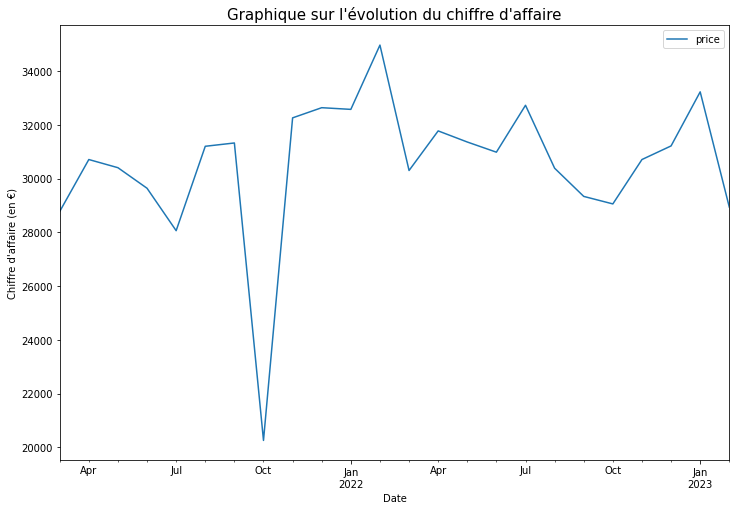

In [ ]:
# Il ne me reste plus qu'à faire apparaitre le graphique.
evolution_ca.plot(x="date", y="price", kind='line',figsize = ( 12, 8)) 
plt.title('Graphique sur l\'évolution du chiffre d\'affaire', fontsize=15)

plt.xlabel('Date') 
plt.ylabel('Chiffre d\'affaire (en €)') 

Nous pouvons analyser une baisse des ventes lors du mois d'octobre.
Pas d'inquiétude, c'est seulement un problème de données manquantes.

##**Sans le mois d'octobre ✔**

In [ ]:
# Je regroupe les prix et j'en fais la somme par mois de l'année.
octobre = df.groupby(df['date'].dt.strftime('%B' ' ' '%Y'))['price'].sum().sort_values()

In [ ]:
octobre

date
October 2021      20257.84
July 2021         28062.68
March 2021        28776.14
February 2023     28940.71
October 2022      29058.17
September 2022    29337.79
June 2021         29640.87
March 2022        30301.71
August 2022       30386.52
May 2021          30405.81
April 2021        30709.85
November 2022     30709.93
June 2022         30983.30
August 2021       31202.67
December 2022     31216.25
September 2021    31325.51
May 2022          31361.53
April 2022        31774.98
November 2021     32260.06
January 2022      32575.85
December 2021     32638.50
July 2022         32728.95
January 2023      33227.85
February 2022     34967.92
Name: price, dtype: float64

In [ ]:
# Je crée le dataframe de ce résultat.
octobre = pd.DataFrame(data=octobre,columns=['price'])

In [ ]:
octobre

,price
date,
October 2021,20257.84
July 2021,28062.68
March 2021,28776.14
February 2023,28940.71
October 2022,29058.17
September 2022,29337.79
June 2021,29640.87
March 2022,30301.71
August 2022,30386.52


In [ ]:
octobre.loc['October 2021'] = 512000.00

In [ ]:
octobre

,price
date,
October 2021,512000.00
July 2021,28062.68
March 2021,28776.14
February 2023,28940.71
October 2022,29058.17
September 2022,29337.79
June 2021,29640.87
March 2022,30301.71
August 2022,30386.52


In [ ]:
# Je sort la colonne date de l'index.
octobre = octobre.reset_index()

In [ ]:
# Nous pouvons voir que cette colonne date est de type object.
octobre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24 non-null     object 
 1   price   24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
# Je transorme la colonne date en datetime.
octobre['date'] = octobre['date'].astype('datetime64[ns]')

In [ ]:
# Je trie les dates par ordre croissant.
octobre = octobre.sort_values(by=['date'])

###**Graphique**

Text(0, 0.5, "Chiffre d'affaire (en €)")

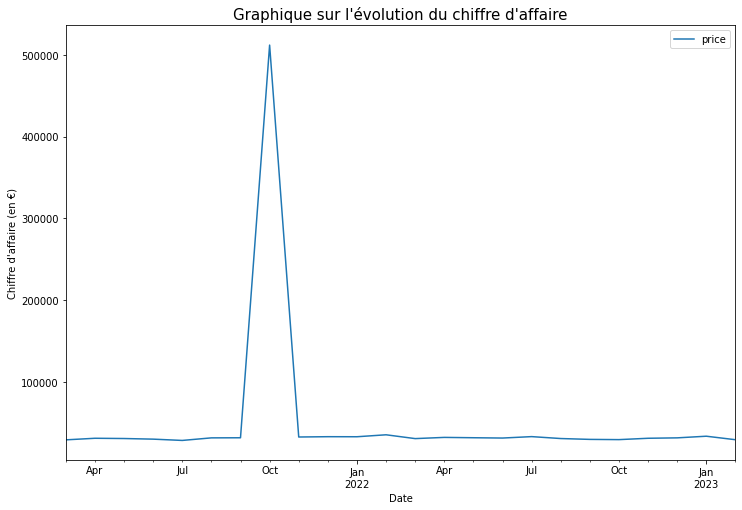

In [ ]:
# Il ne me reste plus qu'à faire apparaitre le graphique.
octobre.plot(x="date", y="price", kind='line',figsize = ( 12, 8)) 
plt.title('Graphique sur l\'évolution du chiffre d\'affaire', fontsize=15)

plt.xlabel('Date') 
plt.ylabel('Chiffre d\'affaire (en €)') 

##**Mettre en place une décomposition en moyenne mobile ✔**

In [ ]:
# Nous prendrons à chaque fois la moyenne de chiffre d'affaire sur 4 mois.
octobre['MM_5mois'] = octobre.price.rolling(5).mean() 
  
print(octobre.head(30)) 

         date      price    MM_5mois
2  2021-03-01   28776.14         NaN
10 2021-04-01   30709.85         NaN
9  2021-05-01   30405.81         NaN
6  2021-06-01   29640.87         NaN
1  2021-07-01   28062.68   29519.070
13 2021-08-01   31202.67   30004.376
15 2021-09-01   31325.51   30127.508
0  2021-10-01  512000.00  126446.346
18 2021-11-01   32260.06  126970.184
20 2021-12-01   32638.50  127885.348
19 2022-01-01   32575.85  128159.984
23 2022-02-01   34967.92  128888.466
7  2022-03-01   30301.71   32548.808
17 2022-04-01   31774.98   32451.792
16 2022-05-01   31361.53   32196.398
12 2022-06-01   30983.30   31877.888
21 2022-07-01   32728.95   31430.094
8  2022-08-01   30386.52   31447.056
5  2022-09-01   29337.79   30959.618
4  2022-10-01   29058.17   30498.946
11 2022-11-01   30709.93   30444.272
14 2022-12-01   31216.25   30141.732
22 2023-01-01   33227.85   30709.998
3  2023-02-01   28940.71   30630.582


###**Graphique**

Text(0.5, 1.0, 'La décomposition en moyenne mobile')

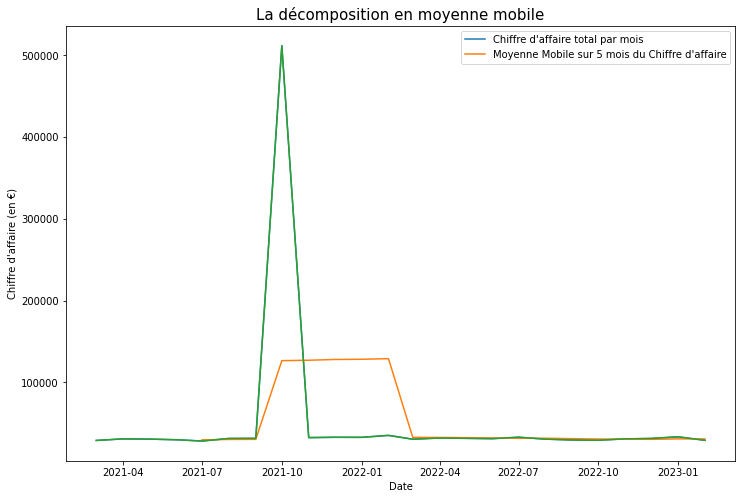

In [ ]:
# Puis nous créons le graphique:
plt.figure(figsize = ( 12, 8)) 

# Avec la moyenne normale.
sns.lineplot( x = 'date', 
             y = 'price', 
             data = octobre, 
             label = 'Chiffre d\'affaire total par mois') 
  
# Puis avec la moyenne des chiffres d'affaires sur 5 mois.  
sns.lineplot( x = 'date', 
             y = 'MM_5mois', 
             data = octobre, 
             label = 'Moyenne Mobile sur 5 mois du Chiffre d\'affaire') 
  
# On nomme les axes.
ax = sns.lineplot(x = 'date', y = 'price',data = octobre)
plt.xlabel('Date') 
plt.ylabel('Chiffre d\'affaire (en €)') 

# On donne un titre
plt.title('La décomposition en moyenne mobile', fontsize=15)

##**Les tops/flops (5 produits) ✔**

In [ ]:
df.head(5)

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18,s_141762,7.2,0
1,c_4430,m,1986,0_1316,2021-05-03 16:41:38,s_29404,7.2,0
2,c_5953,m,1986,0_1316,2022-03-15 18:59:39,s_179609,7.2,0
3,c_5953,m,1986,0_1316,2021-04-15 18:59:39,s_21039,7.2,0
4,c_2191,m,1972,0_1316,2021-06-11 20:32:51,s_47328,7.2,0


In [ ]:
# Je prend le chiffre d'affaire réalisé par produit.
top_flop = df.groupby(['id_prod']).sum()

In [ ]:
top_flop

,birth,price,categ
id_prod,,,
0_0,176021,333.75,0
0_1,77214,428.61,0
0_10,5908,53.85,0
0_1000,69151,239.40,0
0_1001,59336,149.70,0
...,...,...,...
2_91,1994,96.99,2
2_92,3960,156.10,4
2_96,65877,1581.03,66


In [ ]:
# Je sort la colonne 'id_prod' de l'index.
top_flop = top_flop.reset_index()

In [ ]:
top_flop = top_flop[['id_prod','price']]

In [ ]:
# Je trie les résultats par ordre décroissant.
top = top_flop.sort_values('price', ascending = False)

In [ ]:
# Je trie les résultats par ordre croissant.
flop = top_flop.sort_values('price', ascending = True)

###**Résultat TOP**

In [ ]:
top.head(5)

,id_prod,price
2527,2_159,5985.59
2503,2_135,4622.33
2580,2_209,4619.34
2488,2_112,4054.20
2480,2_102,3962.38


###**Résultat Flop**

In [ ]:
flop.head(5)

,id_prod,price
2658,T_0,-11.00
1473,0_528,0.62
185,0_120,0.66
779,0_1844,0.77
1552,0_612,0.88


##**La répartition du chiffre d'affaire par clients ✔**

In [ ]:
# Je copie le dataframe avec seulement les colonnes 'client_id' et 'price'.
clients = df[['client_id','price','birth']]

In [ ]:
clients

,client_id,price,birth
0,c_4410,7.20,1967
1,c_4430,7.20,1986
2,c_5953,7.20,1986
3,c_5953,7.20,1986
4,c_2191,7.20,1972
...,...,...,...
41859,c_4773,11.99,1975
41860,c_6920,12.99,1990
41861,c_3570,5.99,1968
41862,c_8455,35.03,1972


In [ ]:
# Je regroupe les résultats par 'client_id'.
client = clients.groupby('client_id').sum()

In [ ]:
# Je reset l'index pour retrouver ma colonne 'client_id'.
client = client.reset_index()

In [ ]:
# Puis je trie les résultats pour ordre décroissant.
client = client.sort_values(by=['price'],ascending=False)

In [ ]:
# Je selectionne seulement les 5 meilleurs clients.
top5_client = client.head(5)

In [ ]:
client

,client_id,price,birth
580,c_1609,19932.31,3100680
3797,c_4958,18098.11,625687
5507,c_6714,10232.75,1133568
2361,c_3454,7131.57,828949
4408,c_5589,681.00,10010
...,...,...,...
1777,c_2856,3.03,1995
3448,c_4581,3.03,1946
2831,c_3944,1.99,1975
7485,ct_1,-5.00,10005


###**Graphique**

Text(0, 0.5, "Chiffre d'affaire (en €)")

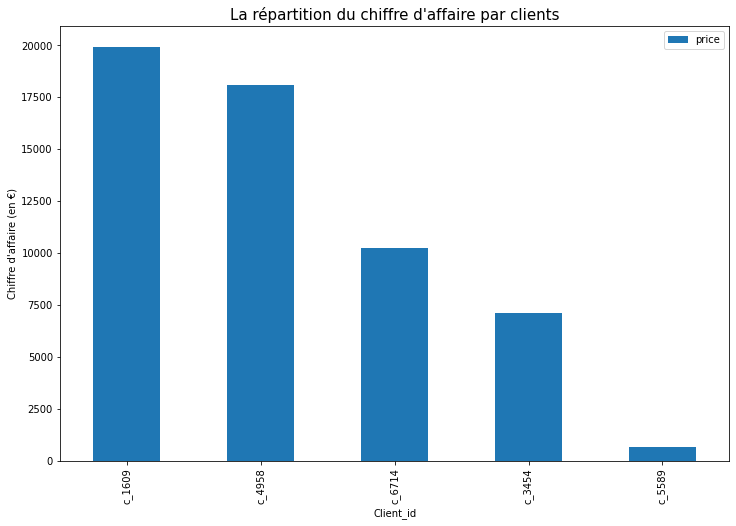

In [ ]:
top5_client.plot(x="client_id", y="price", kind='bar',figsize=(12,8))
plt.title('La répartition du chiffre d\'affaire par clients', fontsize=15)

plt.xlabel('Client_id') 
plt.ylabel('Chiffre d\'affaire (en €)') 

**Explication du graphique**

In [ ]:
# Je calcul le chiffre d'affaire réalisé par 5 clients.
ca_5clients = top5_client['price'].sum()

In [ ]:
ca_5clients

56075.74

In [ ]:
# Je calcul le chiffre d'affaire total.
ca_total = df['price'].sum()

In [ ]:
# Puis j'éxecute un taux d'évolution pour connaitre la part de ca détenu par 5 clients.
round(ca_5clients / ca_total * 100,2)

7.65

Les 5 meilleurs clients représentent environ 7,5% du chiffre d'affaire total.

##**La courbe de Lorenz ✔**

In [ ]:
#On prepare la courbe de Lorenz : l'équilibre des ventes selon les produits

ventes_prod = df['price'].values
n = len(ventes_prod)
lorenz = np.cumsum(np.sort(ventes_prod)) / ventes_prod.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

###**Graphique**

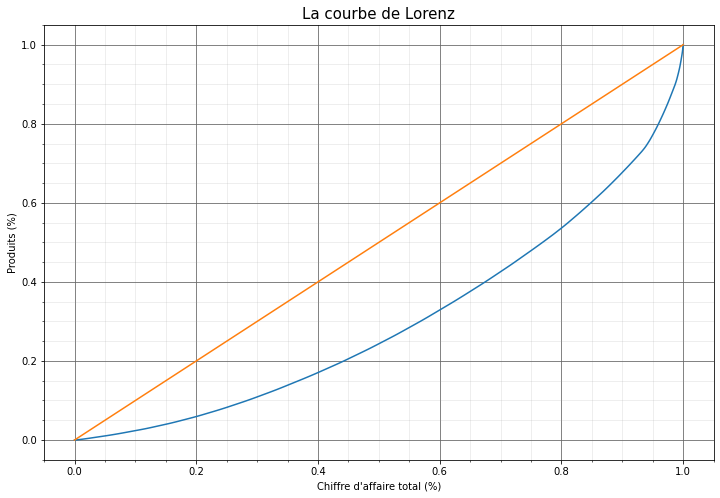

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 8))
xaxis = np.linspace(0-1/n,1+1/n,n+1)
ax.plot(xaxis,lorenz,drawstyle='steps-post')
ax.plot([0,1])
plt.title("La courbe de Lorenz", fontsize=15)
plt.xlabel("Chiffre d'affaire total (%)")
plt.ylabel("Produits (%)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

#plt.savefig("produits.jpeg", format="jpeg")

In [ ]:
# Calcul de l'indice de Gini

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC # surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.39702259535943474

L'indice de Gini est peu important, la répartition du CA selon les produits est plutôt équilibré.

Cette indice reste quand même plus proche d'une distribution égalitaire.

25% des produits représente 50% du chiffre d'affaire.

#**Demande de Julie : L'analyse des clients**

##**Le lien entre le genre d’un client et les catégories des livres achetés ✔**

In [ ]:
# Je crée un dataframe avec les colonnes 'sex', 'categ' et 'price'.
sex_achat_homme = df[['sex','categ','price']]

In [ ]:
# Je supprime toutes les lignes, qui ont un sexe féminin.
sex_achat_homme.drop( sex_achat_homme[ sex_achat_homme['sex'] == 'f' ].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Je regroupe le chiffre d'affaire par catégories.
sex_achat_homme = sex_achat_homme.groupby('categ').sum()

In [ ]:
sex_achat_homme

,price
categ,
0,135306.06
1,141100.73
2,92564.71


In [ ]:
# Je sort la colonne 'categ' de l'index.
sex_achat_homme = sex_achat_homme.reset_index()

In [ ]:
sex_achat_homme

,categ,price
0,0,135306.06
1,1,141100.73
2,2,92564.71


Répartition du CA par catégories pour les hommes terminé.

In [ ]:
# Je crée un dataframe avec les colonnes 'sex', 'categ' et 'price'.
sex_achat_femme = df[['sex','categ','price']]

In [ ]:
# Je supprime toutes les lignes, qui ont un sexe masculin.
sex_achat_femme.drop( sex_achat_femme[ sex_achat_femme['sex'] == 'm' ].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sex_achat_femme.head(2)

,sex,categ,price
0,f,0,7.2
5,f,0,7.2


In [ ]:
# Je regroupe le chiffre d'affaire par catégories.
sex_achat_femme = sex_achat_femme.groupby('categ').sum()

In [ ]:
sex_achat_femme

,price
categ,
0,136315.15
1,145198.29
2,82355.45


In [ ]:
# Je sort la colonne 'categ' de l'index.
sex_achat_femme = sex_achat_femme.reset_index()

In [ ]:
sex_achat_femme

,categ,price
0,0,136315.15
1,1,145198.29
2,2,82355.45


Répartition du CA par catégories pour les femmes terminé.

###**Graphique**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


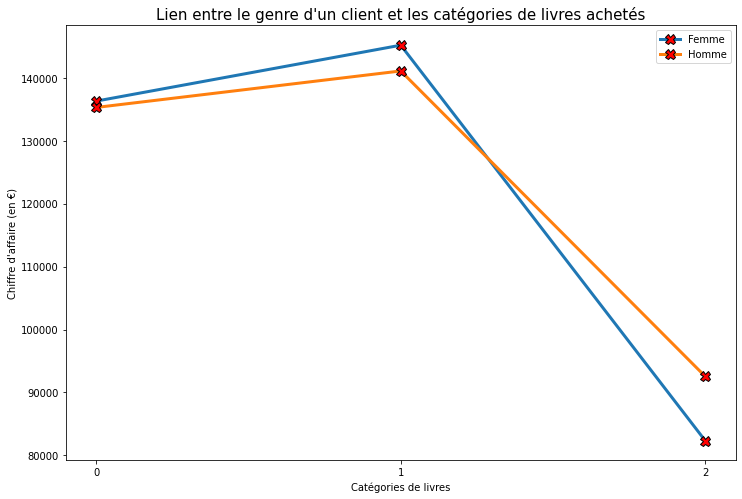

In [ ]:
x = sex_achat_femme['categ']
y = sex_achat_homme['price']
z = sex_achat_femme['price']

plt.figure(figsize=(12,8))

plt.xlabel('Catégories de livres') 
plt.ylabel('Chiffre d\'affaire (en €)') 

plt.xticks(range(10), range(3)[::+1])
plt.plot(x, z, linestyle="-", label="Femme", ls="--", lw=3, marker="X", markersize=10, markerfacecolor="red", markeredgecolor="black")
plt.plot(x, y, linestyle="-", label="Homme", ls="--", lw=3, marker="X", markersize=10, markerfacecolor="red", markeredgecolor="black")
plt.title('Lien entre le genre d\'un client et les catégories de livres achetés', fontsize=15)
plt.legend()
plt.show()

Les hommes achetent plus de livres de "catégories 0" et de "catégorie 2" que les femmes.

Les femmes elles, achetent plus de livres de "catégories 1" que les hommes.

##**Le lien entre l’âge des clients et le montant total des achats ✔**

In [ ]:
# Je regroupe les prix et j'en fais la somme par âge.
age_achat = df.groupby(['birth']).sum()

In [ ]:
# Je supprime la colonne 'birth'.
del age_achat['categ']

In [ ]:
# Je sort la colonne 'categ' et 'sex' des index.
age_achat = age_achat.reset_index()

In [ ]:
# J'affiche les "années de naissance" qui ont réalisé le plus de CA dans la boutique.
print(age_achat.sort_values(by=['price']))

    birth     price
1    1930    216.67
0    1929    237.59
2    1931    250.58
6    1935    311.74
4    1933    353.20
..    ...       ...
50   1979  20866.90
59   1988  21116.96
70   1999  29777.80
51   1980  38130.29
75   2004  39009.70

[76 rows x 2 columns]


###**Graphique**

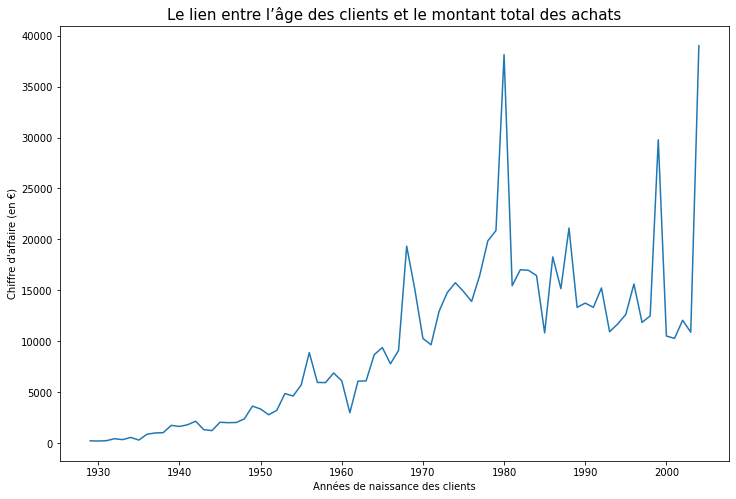

In [ ]:
fid, ax = plt.subplots(figsize=(12,8))
x = age_achat['birth']
y = age_achat['price']
ax.plot(x,y)

plt.xlabel('Années de naissance des clients') 
plt.ylabel('Chiffre d\'affaire (en €)') 

plt.title('Le lien entre l’âge des clients et le montant total des achats', fontsize=15)
plt.show()

Les personnes qui ont le plus gros montant des achats sont nées en :
- 1980 (613 614€)
- 2004 (609 013€)
- 1999 (489 497€)
- 1979 (334 267€)
- 1988 (330 760€)

Pourquoi le pic en 1980 ?

Nous avons l'un de nos meilleur client qui est né lors de cette année.

In [ ]:
print(clients.loc[2724])
#id_client : c_3454

client_id    c_1609
price         13.23
birth          1980
Name: 2724, dtype: object


##**Le lien entre l'âge des clients et leur fréquence d'achat ✔**

In [ ]:
# Groupby sur l'id_client pour avoir le montant total de leurs achats

df_freq = df.groupby(["client_id","birth"]).agg({"session_id": "count"})
df_freq = pd.DataFrame(df_freq)
df_freq = df_freq.rename(columns={"session_id":"nb_achats"})

nb_mois_annee = 12
df_freq.nb_achats = df_freq.nb_achats/nb_mois_annee
df_freq.reset_index(inplace=True)

###**Graphique**

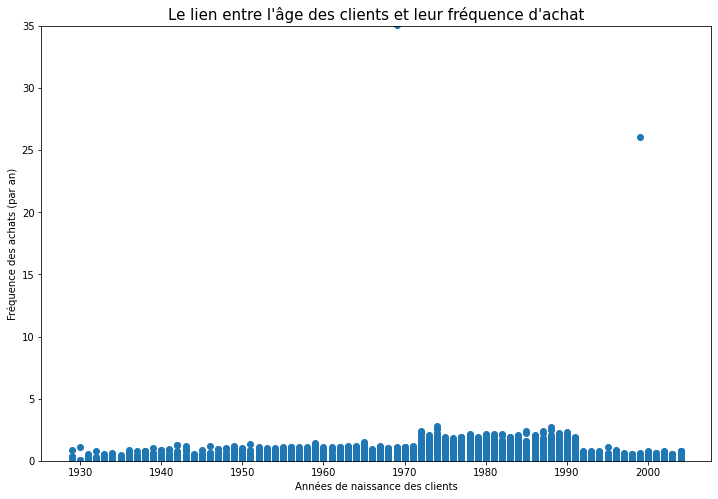

In [ ]:
# Diagramme de dispersion
X = df_freq["birth"]
y = df_freq["nb_achats"]


plt.figure(figsize=(12,8))
plt.scatter (X,y)


plt.title("Le lien entre l'âge des clients et leur fréquence d'achat", fontsize=15)
plt.xlabel("Années de naissance des clients")
plt.ylabel("Fréquence des achats (par an)")

plt.ylim(0,35)
plt.xlim(None,None)

plt.show()

Nous pouvons constater que les clients qui ont la plus grosse fréquence d'achat sont nées entre 1972 et 1991.

En soit, ce sont des personnes qui ont entre 31 et 50 ans.

##**Le lien entre l'âge des clients et leur taille de panier moyen ✔**

In [ ]:
# Groupby sur l'age pour avoir le nombre d'achats moyen par panier
df_panier_moyen = df.groupby(['client_id',"birth"]).agg({"price": "mean"})

# Je recrée le dataframe
df_panier_moyen = pd.DataFrame(df_panier_moyen)

# Puis je reset l'index
df_panier_moyen.reset_index(inplace=True)

###**Graphique**

Text(0, 0.5, 'Panier moyen (en €)')

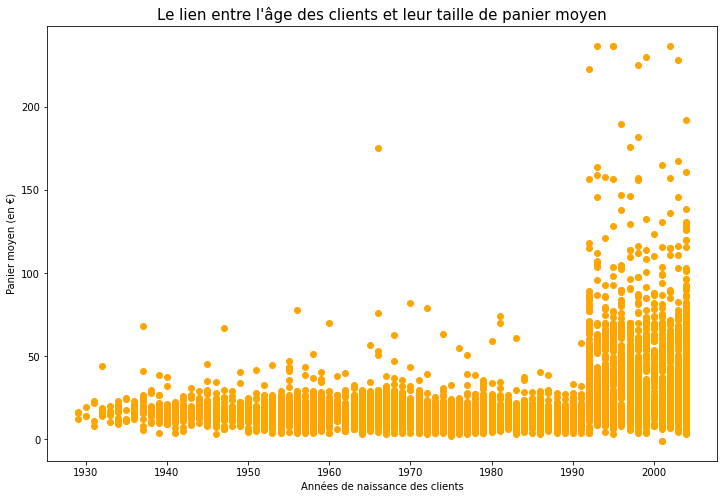

In [ ]:
# Diagramme de dispersion
X = df_panier_moyen["birth"]
y = df_panier_moyen["price"]

plt.figure(figsize=(12,8))
plt.scatter (X,y,c="orange")

plt.title("Le lien entre l'âge des clients et leur taille de panier moyen", fontsize=15)
plt.xlabel("Années de naissance des clients")
plt.ylabel("Panier moyen (en €)")

Nous pouvons constater que plus le client est jeune, plus son panier moyen sera important.

Cependant les personnes qui sont nées avant 1992 achètent beaucoup moins.

En conclusion, les personnes qui détiennent le plus gros panier moyen ont moins de 30 ans.

##**Le lien entre l'âge des clients et les catégories de livres achetés ✔**

In [ ]:
# Je crée un nouveau DataFrame avec les colonnes 'birth' et 'categ'.
corr_age_categ = df[['birth', 'categ']]

In [ ]:
# Je regroupe les résultats sur les années de naissance et je fais une moyenne pour les catégories.
corr_categ = corr_age_categ.groupby(['birth']).mean()

In [ ]:
# Suppression des doublons dans les années de naissance.
corr_age = corr_age_categ.drop_duplicates(subset=['birth'])

In [ ]:
# Suppression de la colonne 'categ'.
corr_age = corr_age['birth']

In [ ]:
# Je recrée mon dataframe.
corr_age = pd.DataFrame(corr_age)

###**Graphique**

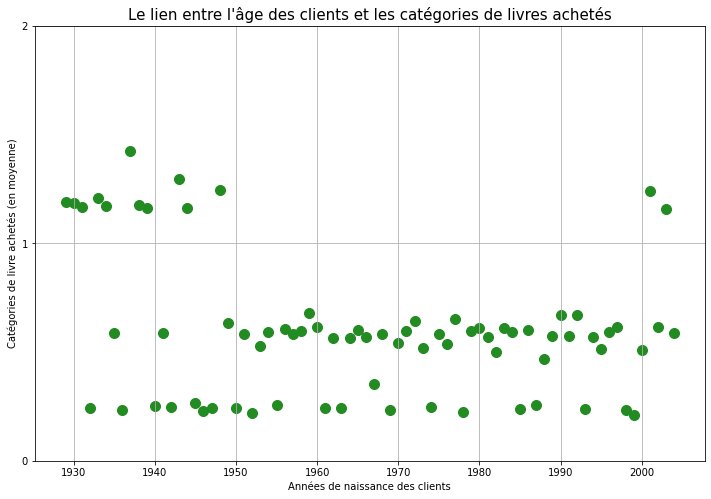

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)

t = corr_age
s = corr_categ

fig, ax = plt.subplots()
ax.scatter(t, s, s=100, c="forestgreen")

ax.set(xlabel='Années de naissance des clients', ylabel='Catégories de livre achetés (en moyenne)')
ax.grid()

ax.set_ylim(0,2)
ticks = [t for t in range(0,3,1)]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)

plt.title("Le lien entre l\'âge des clients et les catégories de livres achetés", fontsize=15)

plt.show()